In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('C:/Users/Boreas/Desktop/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Boreas/Desktop/archive\Data Description_Metro.pdf
C:/Users/Boreas/Desktop/archive\MetroPT3(AirCompressor).csv


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [15]:
data = pd.read_csv("C:/Users/Boreas/Desktop/archive/MetroPT3(AirCompressor).csv")
data

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [16]:
data.isna().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

In [17]:
# Check for missing values and data types
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Cau

In [18]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [19]:
# Convert the 'timestamp' column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0'])

# Normalize sensor data
sensor_columns = [
    'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 
    'Oil_temperature', 'Motor_current', 'COMP', 
    'DV_eletric', 'Towers', 'MPG', 'LPS', 
    'Pressure_switch', 'Oil_level', 'Caudal_impulses'
]
scaler = StandardScaler()
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])
data

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.424441,0.584247,0.531575,-0.209090,0.583993,-1.387941,-0.873208,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
1,2020-02-01 00:00:10,-0.425056,0.568600,0.529175,-0.203860,0.568326,-1.376431,-0.873208,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
2,2020-02-01 00:00:19,-0.424441,0.552953,0.526175,-0.203860,0.552660,-1.387941,-0.872122,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
3,2020-02-01 00:00:29,-0.424441,0.537306,0.523175,-0.203860,0.536993,-1.414797,-0.873208,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
4,2020-02-01 00:00:39,-0.424441,0.521659,0.520175,-0.203860,0.521327,-1.407124,-0.873208,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,2020-09-01 03:59:10,-0.425056,-0.104227,0.401370,-0.203860,-0.105331,-0.455657,-0.872122,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
1516944,2020-09-01 03:59:20,-0.425056,-0.126133,0.395970,-0.198629,-0.127264,-0.467167,-0.871036,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
1516945,2020-09-01 03:59:30,-0.425056,-0.148039,0.392369,-0.203860,-0.146064,-0.467167,-0.872122,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
1516946,2020-09-01 03:59:40,-0.424441,-0.169945,0.388769,-0.203860,-0.167997,-0.474840,-0.871036,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065


In [20]:
# Define segmentation parameters
segment_length = 60  # Segment length in seconds (e.g., 1 minute)

# Convert the timestamp column to the index for easy resampling
data.set_index('timestamp', inplace=True)

# Resample the data into intervals of 'segment_length' seconds and compute features
segmented_data = data.resample(f'{segment_length}S').agg({
    'TP2': ['mean', 'std', 'min', 'max'],
    'TP3': ['mean', 'std', 'min', 'max'],
    'H1': ['mean', 'std', 'min', 'max'],
    'DV_pressure': ['mean', 'std', 'min', 'max'],
    'Reservoirs': ['mean', 'std', 'min', 'max'],
    'Oil_temperature': ['mean', 'std', 'min', 'max'],
    'Motor_current': ['mean', 'std', 'min', 'max'],
    'COMP': ['mean', 'std'],
    'DV_eletric': ['mean', 'std'],
    'Towers': ['mean', 'std'],
    'MPG': ['mean', 'std'],
    'LPS': ['mean', 'std'],
    'Pressure_switch': ['mean', 'std'],
    'Oil_level': ['mean', 'std'],
    'Caudal_impulses': ['mean', 'std']
})

# Flatten the column MultiIndex
segmented_data.columns = ['_'.join(col).strip() for col in segmented_data.columns.values]

# Drop any rows with missing values due to resampling
segmented_data.dropna(inplace=True)

# Reset index for further processing
segmented_data.reset_index(inplace=True)

# Print the shape and a preview of the segmented data
print(f"Segmented data shape: {segmented_data.shape}")
segmented_data.head()

Segmented data shape: (252622, 45)


,timestamp,TP2_mean,TP2_std,TP2_min,TP2_max,TP3_mean,TP3_std,TP3_min,TP3_max,H1_mean,...,MPG_mean,MPG_std,LPS_mean,LPS_std,Pressure_switch_mean,Pressure_switch_std,Oil_level_mean,Oil_level_std,Caudal_impulses_mean,Caudal_impulses_std
0,2020-02-01 00:00:00,-0.424528,0.000233,-0.425056,-0.424441,0.536412,0.035021,0.487235,0.584247,0.522918,...,0.448291,0.0,-0.058581,0.0,0.092937,0.0,0.325583,0.0,0.259065,0.0
1,2020-02-01 00:01:00,-0.424748,0.000337,-0.425056,-0.424441,0.430905,0.030853,0.387093,0.471588,0.502574,...,0.448291,0.0,-0.058581,0.0,0.092937,0.0,0.325583,0.0,0.259065,0.0
2,2020-02-01 00:02:00,-0.424646,0.000318,-0.425056,-0.424441,0.334415,0.030625,0.293210,0.374576,0.484173,...,0.448291,0.0,-0.058581,0.0,0.092937,0.0,0.325583,0.0,0.259065,0.0
3,2020-02-01 00:03:00,-0.424543,0.000251,-0.425056,-0.424441,0.237924,0.030125,0.196198,0.277563,0.465772,...,0.448291,0.0,-0.058581,0.0,0.092937,0.0,0.325583,0.0,0.259065,0.0
4,2020-02-01 00:04:00,-0.424748,0.000337,-0.425056,-0.424441,0.142476,0.029978,0.102315,0.180551,0.447572,...,0.448291,0.0,-0.058581,0.0,0.092937,0.0,0.325583,0.0,0.259065,0.0


In [21]:
# Prepare data for training
features = segmented_data.drop(columns=['timestamp']).values
train_data, val_data = train_test_split(features, test_size=0.2, random_state=42)
# Define Sparse Autoencoder model
input_dim = train_data.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_layer)
bottleneck = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(input_dim, activation='linear')(decoder)
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
# Train the model
history = autoencoder.fit(
    train_data, train_data,
    epochs=50,
    batch_size=256,
    validation_data=(val_data, val_data),
    shuffle=True
)

# Save the trained model
autoencoder.save('sparse_autoencoder_model.h5')

Epoch 1/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3280 - val_loss: 0.0410
Epoch 2/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0360 - val_loss: 0.0261
Epoch 3/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0245 - val_loss: 0.0209
Epoch 4/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0195 - val_loss: 0.0175
Epoch 5/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0169 - val_loss: 0.0153
Epoch 6/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0140 - val_loss: 0.0129
Epoch 7/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0125 - val_loss: 0.0127
Epoch 8/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0113 - val_loss: 0.0124
Epoch 9/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0108 - val_loss: 0.0101
Epoch 10/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0101 - val_loss: 0.0096
Epoch 11/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 12/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [22]:
# Load the trained model
#autoencoder = tf.keras.models.load_model('sparse_autoencoder_model.h5')
# Calculate reconstruction error
reconstructed = autoencoder.predict(features)
reconstruction_error = np.mean(np.power(features - reconstructed, 2), axis=1)

# Set anomaly threshold (e.g., 95th percentile of error)
threshold = np.percentile(reconstruction_error, 95)

7895/7895 ━━━━━━━━━━━━━━━━━━━━ 4s 503us/step


In [23]:
# Flag anomalies
segmented_data['reconstruction_error'] = reconstruction_error
segmented_data['anomaly'] = reconstruction_error > threshold

# Print summary of anomalies
print(f"Anomaly threshold: {threshold}")
print(f"Number of anomalies detected: {segmented_data['anomaly'].sum()}")

Anomaly threshold: 0.007130985287303506
Number of anomalies detected: 12632


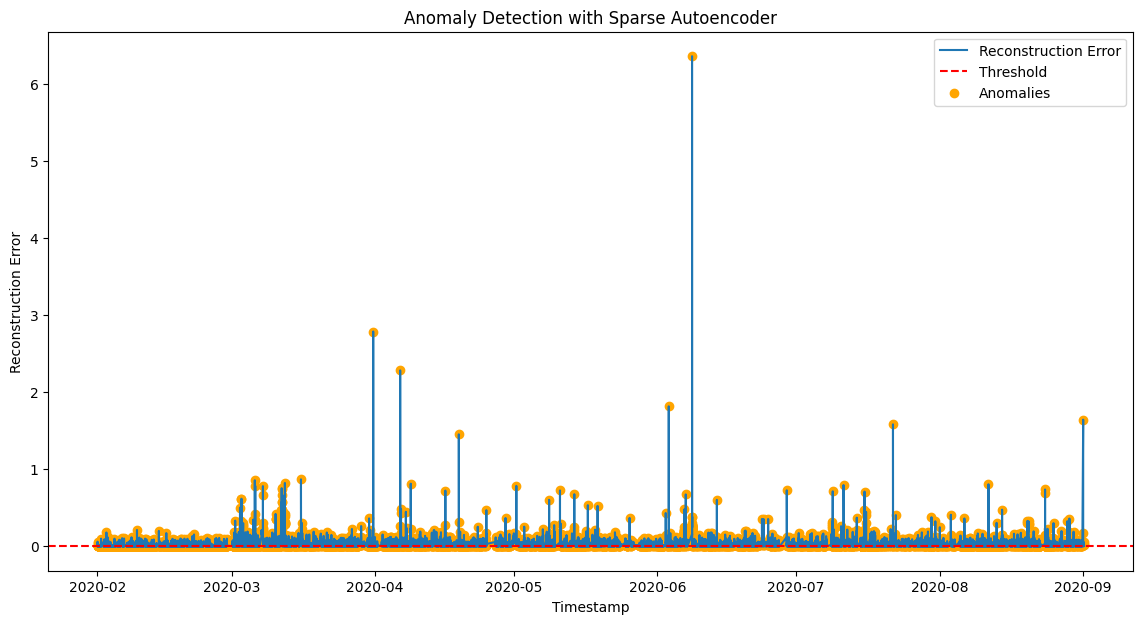

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(segmented_data['timestamp'], segmented_data['reconstruction_error'], label='Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.scatter(
    segmented_data['timestamp'][segmented_data['anomaly']],
    segmented_data['reconstruction_error'][segmented_data['anomaly']],
    color='orange',
    label='Anomalies'
)
plt.xlabel('Timestamp')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection with Sparse Autoencoder')
plt.legend()
plt.show()